# Linear classifier with two classes of 2D points

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [38]:
num_samples_per_calss = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_calss
)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_calss
)
print(f"negative_samples: {negative_samples}")
print(f"positive_samples: {positive_samples}")

negative_samples: [[ 0.91402561  1.48401028]
 [-0.67972916  2.55849682]
 [-0.89442764  3.53421175]
 ...
 [ 0.04025815  3.44413935]
 [ 0.73040415  2.1746947 ]
 [ 1.33388446  3.42473768]]
positive_samples: [[ 2.75025017 -0.00945869]
 [ 3.59408538  0.35534289]
 [ 2.45779892 -0.53331581]
 ...
 [ 2.31799038 -1.1130415 ]
 [ 3.09537721  0.41596012]
 [ 2.19062067 -0.30896992]]


In [39]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)
print(f"inputs: {inputs}")
targets = np.vstack((
    np.zeros((num_samples_per_calss, 1), dtype="float32"),
    np.ones((num_samples_per_calss, 1), dtype="float32")
))
print(f"targets: {targets}")


inputs: [[ 0.9140256   1.4840103 ]
 [-0.67972916  2.5584967 ]
 [-0.89442766  3.5342116 ]
 ...
 [ 2.3179903  -1.1130415 ]
 [ 3.0953772   0.41596013]
 [ 2.1906207  -0.30896991]]
targets: [[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


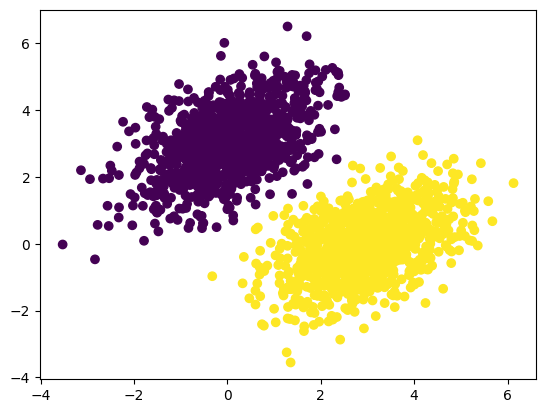

In [40]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [41]:
input_dim = inputs.shape[-1]
output_dim = targets.shape[1]
print(f"input_dim: {input_dim}, output_dim: {output_dim}")

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(f"W:\n {W}, \nb:\n {b}")

input_dim: 2, output_dim: 1
W:
 <tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.5786611 ],
       [0.12294543]], dtype=float32)>, 
b:
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [42]:
def model(inputs):
    return tf.matmul(inputs, W) + b
print(f"model:\n {model(inputs)}")

model:
 [[ 0.7113633 ]
 [-0.07877734]
 [-0.08305535]
 ...
 [ 1.2044874 ]
 [ 1.8423147 ]
 [ 1.2296405 ]]


In [43]:
def squared_loss(targets, predictions):
    per_sample_loss = tf.square(predictions - targets)
    return tf.reduce_mean(per_sample_loss)

In [44]:
learning_rate = 0.1
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = squared_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * grad_loss_wrt_W)
    b.assign_sub(learning_rate * grad_loss_wrt_b)
    return loss

In [45]:
for step in range(40):
    loss = train_step(inputs, targets)
    print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 0.6950
loss at step 1: 0.1559
loss at step 2: 0.1058
loss at step 3: 0.0952
loss at step 4: 0.0889
loss at step 5: 0.0835
loss at step 6: 0.0786
loss at step 7: 0.0740
loss at step 8: 0.0699
loss at step 9: 0.0661
loss at step 10: 0.0627
loss at step 11: 0.0595
loss at step 12: 0.0566
loss at step 13: 0.0540
loss at step 14: 0.0515
loss at step 15: 0.0493
loss at step 16: 0.0473
loss at step 17: 0.0454
loss at step 18: 0.0437
loss at step 19: 0.0421
loss at step 20: 0.0407
loss at step 21: 0.0394
loss at step 22: 0.0382
loss at step 23: 0.0371
loss at step 24: 0.0361
loss at step 25: 0.0352
loss at step 26: 0.0343
loss at step 27: 0.0336
loss at step 28: 0.0329
loss at step 29: 0.0322
loss at step 30: 0.0316
loss at step 31: 0.0311
loss at step 32: 0.0306
loss at step 33: 0.0302
loss at step 34: 0.0297
loss at step 35: 0.0294
loss at step 36: 0.0290
loss at step 37: 0.0287
loss at step 38: 0.0284
loss at step 39: 0.0281


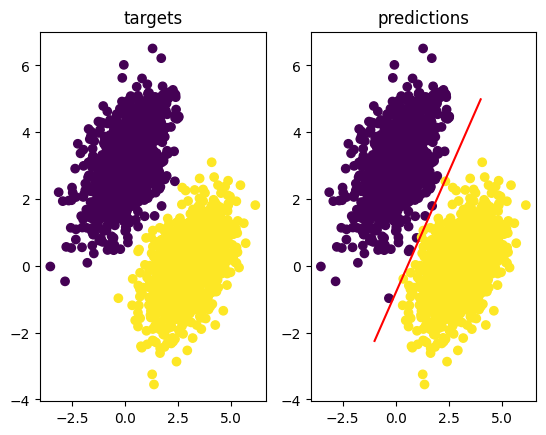

In [46]:
predictions = model(inputs)

# create to subfigure plot
f = plt.figure()

f.add_subplot(1, 2, 1)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.title("targets")

f.add_subplot(1, 2, 2)
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.title("predictions")
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'sh'

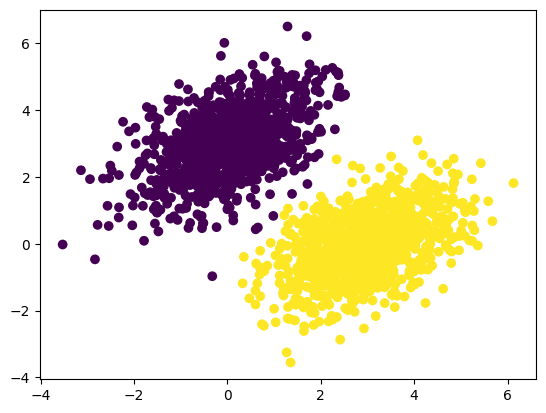

In [47]:

plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.sh

# With Keras

In [49]:
from tensorflow import keras

In [52]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
    optimizer="rmsprop",
    loss="mean_squared_error",
    metrics=["accuracy"]
)
history = model.fit(inputs, targets, epochs=5, batch_size=128)
print(history.history)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.5150 - loss: 1.6141
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.5202 - loss: 1.4084
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.5175 - loss: 1.2629
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.5306 - loss: 1.1048
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - accuracy: 0.5158 - loss: 0.9824
{'accuracy': [0.5189999938011169, 0.5195000171661377, 0.5210000276565552, 0.5214999914169312, 0.5274999737739563], 'loss': [1.5595264434814453, 1.3708901405334473, 1.2187007665634155, 1.07921302318573, 0.9492233991622925]}


## Build a bit more verbose

In [53]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.BinaryAccuracy()]
)
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]
num_validation_samples = int(0.3 * len(inputs)) 
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples] 
training_inputs = shuffled_inputs[num_validation_samples:]  
training_targets = shuffled_targets[num_validation_samples:]   
model.fit(
    training_inputs,   
    training_targets, 
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets) 
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9556 - loss: 0.1499 - val_binary_accuracy: 0.8983 - val_loss: 0.0999
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - binary_accuracy: 0.9624 - loss: 0.0665 - val_binary_accuracy: 0.9500 - val_loss: 0.0782
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - binary_accuracy: 0.9576 - loss: 0.0631 - val_binary_accuracy: 0.9483 - val_loss: 0.0778
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - binary_accuracy: 0.9555 - loss: 0.0649 - val_binary_accuracy: 0.9250 - val_loss: 0.1018
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 690us/step - binary_accuracy: 0.9631 - loss: 0.0684 - val_binary_accuracy: 0.9867 - val_loss: 0.0771
